# Problem Statement

Our client is a credit card company. They have brought us a dataset that includes some demographics and recent financial data (the past six months) for a sample of 30,000 of their account holders. This data is at the credit account level; in other words, there is one row for each account (you should always clarify what the definition of a row is, in a dataset). Rows are labeled by whether in the next month after the six month historical data period, an account owner has defaulted, or in other words, failed to make the minimum payment.

**Task 1 : To perform data exploration and cleaning of the given dataset**


In [1]:
#import the required packages
import numpy as np
import pandas as pd

In [4]:
#reading the dataset
df = pd.read_excel('C:\\Users\Shiwani\Mini Project 2\Task 1\dataset\default_of_credit_card_clients.xls')

In [5]:
#displaying the first few rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [33]:
df.shape

(30000, 25)

In [48]:
#random seed generation 
#used to done reproducible results even with other examples
np.random.seed(seed=24)
random_integers = np.random.randint(low=1,high=5,size=100)

In [42]:
random_integers[:10]

array([3, 4, 1, 4, 2, 2, 2, 1, 4, 4])

In [43]:
is_equal_to_3 = random_integers == 3

In [45]:
is_equal_to_3[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [46]:
sum(is_equal_to_3)

22

In [47]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [49]:
#finding out the duplicate entries and cleaning them
dupe_mask = id_counts == 2
dupe_mask[0:5]

96970f37-abaa    True
1a055566-c187    True
0a5048ae-e120    True
c84dd06b-71f5    True
a9d910f4-fe9a    True
Name: ID, dtype: bool

In [50]:
id_counts.index[0:5]
dupe_ids = id_counts.index[dupe_mask]

In [51]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [52]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4402,0a5048ae-e120,270000,1,1,2,48,Not available,0,0,0,...,26872,23660,12053,2680,1420,15,42,2476,0,0
4502,0a5048ae-e120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24908,96970f37-abaa,210000,1,1,2,32,-2,-2,-2,-2,...,5365,789,1086,1146,3988,5381,791,1088,948,0
25008,96970f37-abaa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27131,1a055566-c187,220000,1,1,2,37,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
27231,1a055566-c187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_zero_mask = df == 0

In [54]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

In [55]:
#clearing out all the duplicate entries of PAY_1
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [56]:
df_clean_1.shape

(29685, 25)

In [57]:
df_clean_1['ID'].nunique()

29685

In [58]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [59]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [60]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [61]:
sum(valid_pay_1_mask)

26664

In [62]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [63]:
df_clean_2.shape

(26664, 25)

In [64]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [65]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [67]:
#import plotting package and rendering automatically
import matplotlib.pyplot as plt 
%matplotlib inline
#additional plotting functionality
import matplotlib as mpl 
#for high resolution figures
mpl.rcParams['figure.dpi'] = 100

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

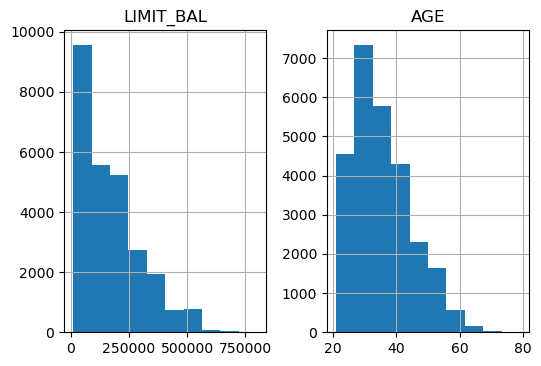

In [68]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [69]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [70]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [71]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [72]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [73]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

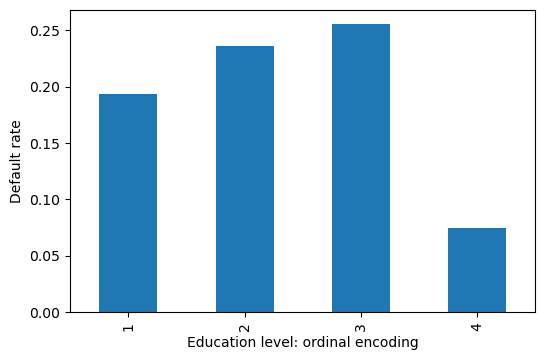

In [74]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [75]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [76]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [77]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [78]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [79]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [80]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [81]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)